In [1]:
import numpy as np #gives you useful array operations
import matplotlib.pyplot as plt #this is for plotting
from value_function_iteration import dynamicProgramingModule

# 2. Coding value function iteration, and speeding up convergence

For the remainder of the problem set use the following parameter values (unless stated otherwise):
β = 0.99, z = 1, α = 0.3, and δ = 0.1. Also use a state space grid with a 500 points starting at 0.1
going up to the effective upper bound, and use an error tolerance of e−5.


## Write code that implements value function iteration. Use an initial guess of V0(k) = 0, ∀k.

### (i) Report the number of times you had to iterate, a plot with only the final value function,
and a plot with all the iterations.


In [2]:
# Define Grid:
k_max = (1/0.1)**(1/(1-0.3))
y = np.linspace(0.01,k_max,500) #state space
V_0 = [0 for k in y] #Initial guess forall states
V_old = np.copy(V_0)
V_new = np.copy(V_0)
policyFunction = np.zeros(V_old.shape)

In [ ]:
bbeta = 0.99
z = 1
dpm = dynamicProgramingModule(bbeta, z)
policyFunction, V_new, count = dpm.valueFunctionIteration(V_old,y)
print('Number of iterations:', count)

In [ ]:
# Plot Value Function, Final iteration
fig, ax2 = plt.subplots()
ax2.plot(y , V_new, color=plt.cm.jet(count/500), linewidth=2.5)
ax2.set_ylabel('value', fontsize=12)
ax2.set_xlabel('Capital $k$', fontsize=12)
ax2.set_title('Value function')
plt.show()

### (ii) Plot the policy rule g(k). Briefly explain what this says about the agents behaviour:

In [ ]:
# Plot Policy Rule, Final iteration
fig, ax3 = plt.subplots()
ax3.plot(y , policyFunction, color=plt.cm.jet(count/500), linewidth=2.5)
ax3.set_ylabel('Policy Function $y$', fontsize=12)
ax3.set_xlabel('Capital $k$', fontsize=12)
ax3.set_title('Value function iterations')
plt.show()

### (iii) Use the policy rule to numerically approximate the steady state level of capital and
consumption, and compare this to the actual steady state of the model.

In [ ]:
#Steady State Numerical Approximation:

# Start with k = k[1], then apply g(k) to get k' and then continue iteratively:
k = y[0]
error = 10
k_transition = []

count = 1
while (error > 1e-5) & (count < 200):
    k_new = policyFunction[k==y][0]
    error = np.abs(k_new-k)
    k_transition.append(k_new)
    k = k_new
    count += 1


fig, ax4 = plt.subplots()
ax4.plot(k_transition, color=plt.cm.jet(count/500), linewidth=2.5)
ax4.set_ylabel('Policy Function $y$', fontsize=12)
ax4.set_xlabel('Time', fontsize=12)
ax4.set_title('Steady State')
plt.show()

In [ ]:
#Steady State approximation:
k_ss_numerical = k_new
c_ss_numerical = dpm.z*k**dpm.aalpha + (1-dpm.ddelta)*k_ss_numerical - k_ss_numerical
print(" Numerical Capital Steady State", round(k_ss_numerical,3),"\n Numerical Consumption Steady State:", round(c_ss_numerical,3))

In [ ]:
steadyStateCapital, steadyStateConsumption = dpm.steadyStateVariables()
print(" Actual Capital Steady State", round(steadyStateCapital,3),"\n Actual Consumption Steady State:", round(steadyStateConsumption,3))

### B: In part 1f we showed that β is the modulus of contraction.2 Therefore, if we reduce β we should get faster convergence. To see this, repeat part 2ai for β = 0.1 and comment on your findings.

In [ ]:
#Evaluate with beta = 0.1
dpm1 = dynamicProgramingModule(0.1, 1)
policyFunction, V_new, count = dpm1.valueFunctionIteration(V_old,y)
print('Number of iterations:', count)

In [ ]:
# Plot latest value function:
fig, ax2 = plt.subplots()
ax2.plot(y , V_new, color=plt.cm.jet(count/500), linewidth=2.5)
ax2.set_ylabel('value', fontsize=12)
ax2.set_xlabel('Capital $k$', fontsize=12)
ax2.set_title('Value function iterations')

### C: As you can probably see from your plots of the iterations, our naive initial guess is quite far from the true value function. Therefore, lets try a better guess.

\begin{align}
V_0(k) = \frac{log(zk^\alpha - \delta k)}{1-\beta}
\end{align}

Repeat part 2ai for this guess and comment on your findings. I would recommend using this
as the initial guess for the remainder of the problem set, it will make your life easier

In [3]:
y = y[:-3].copy()

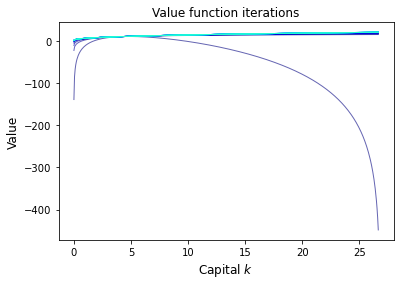

Number of iterations: 36


In [4]:
# Now let's use a new initial values for v0:
dpm = dynamicProgramingModule(0.99, 1)
V_old = dpm.smartInitialGuessV0(y)
policyFunction, V_new, count = dpm.valueFunctionIteration(V_old,y)

print("Number of iterations:", count)

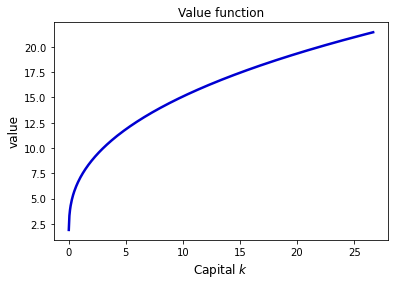

In [5]:
fig, ax2 = plt.subplots()
ax2.plot(y , V_new, color=plt.cm.jet(count/500), linewidth=2.5)
ax2.set_ylabel('value', fontsize=12)
ax2.set_xlabel('Capital $k$', fontsize=12)
ax2.set_title('Value function')
plt.show()

# 3. Comparative statics the effect of permanent productivity shocks

So far we have done a bunch of tedious mathematics and coding, but we are economists after all,
so let’s now do some economics. In this section, we will use our machinery from the previous parts
to study how our economy responds to a permanent productivity increase (an increase in z)

In [ ]:
dpm2 = dynamicProgramingModule(0.99, 1)
V_old = dpm2.smartInitialGuessV0(y)
policyFunctionZ1, V_new, count = dpm2.valueFunctionIteration(V_old,y)
steadyStateCapitalZ1, steadyStateConsumptionZ1 = dpm2.steadyStateVariables()

In [ ]:
fig, ax3 = plt.subplots()
ax3.plot(y, policyFunctionZ1, color=plt.cm.jet(count/500), linewidth=2.5)
ax3.set_ylabel('Policy Function $y$', fontsize=12)
ax3.set_xlabel('Capital $k$', fontsize=12)
ax3.set_title('Policy Function $z = 1$')
plt.show()

In [ ]:
dpm3 = dynamicProgramingModule(0.99, 2)
V_old = dpm3.smartInitialGuessV0(y)
policyFunctionZ2, V_new, count = dpm3.valueFunctionIteration(V_old,y)

In [ ]:
fig, ax3 = plt.subplots()
ax3.plot(y , policyFunctionZ2, color=plt.cm.jet(count/500), linewidth=2.5)
ax3.set_ylabel('Policy Function $y$', fontsize=12)
ax3.set_xlabel('Capital $k$', fontsize=12)
ax3.set_title('Policy Function $z = 2$')
plt.show()

In [ ]:
# Plot productivity shock simulation
k = dpm3.find_nearest(y,steadyStateCapitalZ1)
error = 10
k_transition = [steadyStateCapitalZ1]*4

for ii in range(29):
    k_new = policyFunctionZ2[k==y][0]
    error = np.abs(k_new-k)
    k_transition.append(k_new)
    k = k_new
    count += 1

In [ ]:
fig, ax4 = plt.subplots()
ax4.plot(k_transition, color=plt.cm.jet(count/500), linewidth=2.5)
ax4.set_ylabel('Capital $k$', fontsize=12)
ax4.set_xlabel('Time', fontsize=12)
ax4.set_title('Transition to Steady State')
plt.show()